SHSAT
======


URLs
- [2017- 2018 Class Size Report City Middle School And High School Core Average Class Size](https://data.cityofnewyork.us/Education/2017-2018-Class-Size-Report-City-Middle-School-And/43qn-d6r8): https://data.cityofnewyork.us/resource/43qn-d6r8.csv?$limit=1000000
- [2010-2011 Class Size - School-level detail](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)

In [4]:
import requests
import pandas as pd
from dotenv import load_dotenv
import os
from nycschools import schools, geo, ui
from bs4 import BeautifulSoup

# read SOCRATA_APP_TOKEN from .envpytho file
load_dotenv()
token = os.getenv("SOCRATA_APP_TOKEN")
# os.environ['NYC_SCHOOLS_DATA_DIR'] = '/home/mxc/Projects/school-data-portal/school-data'
os.getenv("NYC_SCHOOLS_DATA_DIR")


'/home/mxc/Projects/school-data-portal/school-data'

In [11]:

df = schools.load_school_demographics()
df = df[df.ay == df.ay.max()]
df.dbn.nunique()
schools.search(df, "lab")

,dbn,beds,district,geo_district,boro,school_name,short_name,ay,year,school_type,...,swd_n,swd_pct,ell_n,ell_pct,poverty_n,poverty_pct,eni,clean_name,zip,match
4759,10X315,321000010315,10,10,Bronx,P.S. 315 Lab School,PS 315,2022,2022-23,community,...,40,0.210526,38,0.200000,183,0.960000,0.918779,lab school,10468,46
2158,02M077,310200010077,2,2,Manhattan,P.S. 77 Lower Lab School,PS 77,2022,2022-23,community,...,27,0.072581,2,0.005376,31,0.083333,0.097865,lower lab school,10128,32
5124,11X265,321100011265,11,11,Bronx,Bronx Lab School,HS 265,2022,2022-23,community,...,60,0.272727,28,0.127273,181,0.822727,0.877482,bronx lab school,10467,32
7004,19K639,331900011639,19,19,Brooklyn,Brooklyn Lab School,HS 639,2022,2022-23,community,...,82,0.208122,82,0.208122,335,0.850254,0.870157,brooklyn lab school,11208,27
3964,08X320,320800011320,8,11,Bronx,Pelham Lab High School,HS 320,2022,2022-23,community,...,76,0.244373,23,0.073955,254,0.816720,0.855334,pelham lab high school,10461,24
8213,24Q343,342400010343,24,24,Queens,The Children's Lab School,PS 343,2022,2022-23,community,...,106,0.236607,121,0.270089,315,0.703125,0.646667,the children's lab school,11104,21
2513,02M412,310200010412,2,2,Manhattan,N.Y.C. Lab School for Collaborative Studies,HS 412,2022,2022-23,community,...,119,0.257576,2,0.004329,212,0.458874,0.425526,nyc lab school for collaborative studies,10011,14
2378,02M312,310200010312,2,2,Manhattan,New York City Lab Middle School for Collaborative,MS 312,2022,2022-23,community,...,113,0.218992,12,0.023256,170,0.329457,0.349346,new york city lab middle school for collaborative,10011,12


In [6]:
def get_address(dbn):
    url = f"https://www.schools.nyc.gov/schools/{dbn[2:]}"
    try:
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'html.parser')
        links = soup.select('a[href^="https://maps.google.com"]')
        return links[0].text
    except:
        print(f"Error: {dbn}")
        return None

df["address"] = df.dbn.apply(get_address)

df[["dbn", "address"]].sort_values("address")


Error: 02M565
Error: 02M896
Error: 03M075
Error: 03M243
Error: 09X117
Error: 09X199
Error: 09X219
Error: 11X175
Error: 11X275
Error: 12X626
Error: 13K869
Error: 25Q409
Error: 28Q335
Error: 30Q389
Error: 79K925
Error: 79M331
Error: 79M379
Error: 79M645
Error: 79M973
Error: 79Q344
Error: 79Q950
Error: 79X695


,dbn,address
5530,15K230,"1 Albemarle Road, Brooklyn, NY 11218"
2207,02M343,"1 Peck Slip, Manhattan, NY 10038"
6366,19K615,"1 Wells Street, Brooklyn, NY 11208"
8924,30Q384,"1-35 57 Avenue, Queens, NY 11101"
8909,30Q301,"1-50 51st Avenue, Queens, NY 11101"
...,...,...
9794,79M645,None
9799,79M973,None
9804,79Q344,None
9809,79Q950,None


In [14]:

from geopy.geocoders import Nominatim
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import GoogleV3
from dotenv import load_dotenv
import os
from nycschools import schools
import folium
from folium.map import Element
load_dotenv()
map_api = os.getenv("GOOGLE_MAPS_KEY")
map_api
geolocator = GoogleV3(api_key=map_api)
point = geolocator.geocode("179 Livingston Street, Brooklyn, NY 11201")
x = (point.longitude, point.latitude)
base_map = folium.Map(location=x, zoom_start=14, tiles="cartodbdarkmatter", crs="EPSG:4326")

circle = folium.Circle(location=x, radius=100, color="Navy", fill=True)
circle.add_to(base_map)
base_map

In [ ]:

df[["dbn","address"]].to_csv("school_addresses.csv", index=False)
demo = schools.load_school_demographics()
demo = demo[demo.ay == demo.ay.max()]

df = gpd.read_file("school_addresses.csv")
df = df.drop_duplicates()
demo["address"] = None
df = pd.concat([df, demo[["dbn", "address"]][~demo.dbn.isin(df.dbn)]])
df = df.merge(demo[["dbn","geo_district"]], on="dbn")
len(df)

In [43]:
# geolocation reverse lookup on address
data = df.copy()

geolocator = GoogleV3(api_key=map_api)
def get_geometry(address):
    if not address or len(address) == 0:
        return None
    try:
        location = geolocator.geocode(address)
        if location:
            return Point(location.longitude, location.latitude)
        else:
            return None
    except Exception as e:
        print(f"Error: {address}")
        print(e)
        return None


# Apply the function to the address column
data['geometry'] = data['address'].apply(get_geometry)


In [47]:

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")
gdf.drop(columns=["geo_district"], inplace=True)
gdf.to_file("school_addresses.geojson", driver='GeoJSON')
gdf.dropna(subset=["geometry"], inplace=True)
gdf = gdf.merge(demo[["dbn","district", "beds", "school_name"]], on="dbn")
# gdf[["address","school_name","dbn"]].sort_values("address")
gdf.head()

,dbn,address,geometry,district,beds,school_name
0,01M015,"333 East 4 Street, Manhattan, NY 10009",POINT (-73.97874 40.72191),1,310100010015,P.S. 015 Roberto Clemente
1,01M020,"166 Essex Street, Manhattan, NY 10002",POINT (-73.98640 40.72107),1,310100010020,P.S. 020 Anna Silver
2,01M034,"730 East 12 Street, Manhattan, NY 10009",POINT (-73.97507 40.72614),1,310100010034,P.S. 034 Franklin D. Roosevelt
3,01M063,"121 East 3 Street, Manhattan, NY 10009",POINT (-73.98626 40.72441),1,310100010063,The STAR Academy - P.S.63
4,01M064,"600 East 6 Street, Manhattan, NY 10009",POINT (-73.98176 40.72385),1,310100010064,P.S. 064 Robert Simon


,dbn,address,geometry,geo_district,district,beds,school_name
37,13K691,"100 Clermont Avenue, Brooklyn, NY 11205",POINT (-73.97168 40.69486),13,13,331300010691,Fort Greene Preparatory Academy
6,13K046,"100 Clermont Avenue, Brooklyn, NY 11205",POINT (-73.97168 40.69486),13,13,331300010046,P.S. 046 Edward C. Blum
14,13K265,"101 Park Avenue, Brooklyn, NY 11205",POINT (-73.97607 40.69680),13,13,331300010265,Dr. Susan S. McKinney Secondary School of the ...
38,13K915,"105 Tech Place, Brooklyn, NY 11201",POINT (-73.98532 40.69555),13,13,331300010915,Bridges: A School for Exploration and Equity
36,13K674,"105 Tech Place, Brooklyn, NY 11201",POINT (-73.98532 40.69555),13,13,331300011674,"City Polytechnic High School of Engineering, A..."
33,13K605,"105 Tech Place, Brooklyn, NY 11201",POINT (-73.98532 40.69555),13,13,331300011605,George Westinghouse Career and Technical Educa...
52,84K780,"1084 Lenox Road, Brooklyn, NY 11212",POINT (-73.92035 40.65786),13,84,331300860937,Brooklyn East Collegiate Charter School
55,84K879,"1104 Fulton Street, Brooklyn, NY 11238",POINT (-73.95680 40.68108),13,84,331300861077,Brooklyn Prospect Charter School - CSD 13
32,13K595,"1119 Bedford Avenue, Brooklyn, NY 11216",POINT (-73.95403 40.68553),13,13,331300011595,Bedford Academy High School
13,13K256,"114 Kosciuszko Street, Brooklyn, NY 11216",POINT (-73.94980 40.69057),13,13,331300010256,P.S. 256 Benjamin Banneker


In [30]:

demo[demo.dbn == "13K869"]


,dbn,beds,district,geo_district,boro,school_name,short_name,ay,year,school_type,...,swd_n,swd_pct,ell_n,ell_pct,poverty_n,poverty_pct,eni,clean_name,zip,address
5221,13K869,0,13,13,Brooklyn,District 13 PRE-K Center,NA 869,2022,2022-23,community,...,6,0.117647,0,0.0,10,0.196078,0.240404,district 13 pre-k center,11201,None


In [92]:
df = schools.load_hs_directory(ay=2021)
loc = geo.load_school_locations()
dbn = loc[loc.geo_district == '13']

df = df[df.dbn.isin(dbn.dbn)]
df = df[["dbn","school_name", "website", "url"]].drop_duplicates().sort_values(by="school_name")
df.website = df.website.apply(lambda x: x if x.startswith("http") else "http://" + x)
df.to_csv("~/Downloads/hs_directory.csv", index=False)


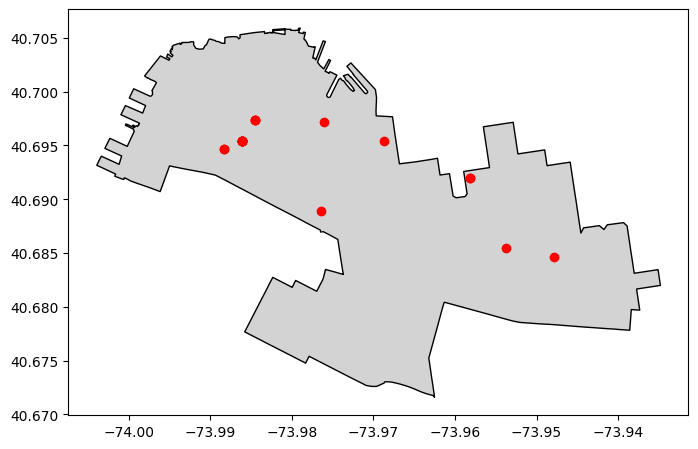

In [93]:
districts = geo.load_districts()
points = geo.load_school_locations()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))


points = points[points.dbn.isin(df.dbn)]
districts[districts.district == 13].plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1)
_ = points.plot(ax=ax, color="red")


In [120]:
district_map = districts.explore(
    column="district",  # use district for the category colors (aka choropleth)
    popup=False,  # turn things off
    tooltip=False,
    legend=False,
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="tab20b",  # use "tab20b" matplotlib colormap
    style_kwds={"color": "black"}  # use black outline
)
data = points.merge(df, on="dbn", how="inner")
data["school info"] = data.apply(ui.popup(["dbn", "school_name", "website", "url"]), axis=1)
# points["school info"]
data = data[["dbn", "school_name", "website", "url", "geometry", "school info"]]

data
# # points.explore(m=district_map, tooltip=False, legend=False, color="red", size=10, alpha=0.5)
# points = geo.load_school_locations()
# points[["dbn", "geometry"]].explore(m=district_map)
data.explore(m=district_map,popup="school info")


In [60]:
x = df.iloc[0]
import re  
p = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
for col in t:
    if p.match(x[col]):
        print(col, x[col])
        print(x[col]) 


url https://www.myschools.nyc/en/schools/high-school/15900
https://www.myschools.nyc/en/schools/high-school/15900


TypeError: cannot use a string pattern on a bytes-like object

In [39]:
df = pd.read_csv("~/Downloads/edx-advising.csv")
df.columns = [c.lower().strip() for c in df.columns]
df.course = df.course.apply(lambda x: f"""{x.split("*")[0]}-{x.split("*")[1]}""")
df = df[df.dept == "0858"]
df.au_email = df.au_email.str.lower()
df["first"] = df["first"].str.title()
df["last"] =  df["last"].str.title()
df = df[(df.major.isin(["EDT", "EDX"]))]
df = df[['term', 'au_email', 'email', 'first', 'last']]
df = df.groupby(['au_email', 'email', 'first', 'last']).term.min()
df = df.reset_index()
df = df[["first", "last", "au_email", "email", "term"]]
df.to_csv("~/Downloads/edx-contact.csv", index=False)

AttributeError: 'Series' object has no attribute 'major'

In [31]:


df.head()


AttributeError: 'Series' object has no attribute 'au_email'

In [5]:
reg = exams.load_regents()
len(reg.regents_exam.unique())

18

In [3]:
import numpy as np
import pandas as pd

# define function to calculate entropy for a row
def entropy(row):
    # get proportions and handle cases where proportion is 0
    p = row[row != 0] / 100

    # calculate entropy
    return -np.sum(p * np.log2(p))

# create example dataframe
df = pd.DataFrame({
    "asian_pct": [10, 20, 30],
    "white_pct": [30, 50, 70],
    "black_pct": [60, 30, 0]
})

# calculate entropy for each row and add to new column "entropy"
df["entropy"] = df.apply(entropy, axis=1)

print(df)

   asian_pct  white_pct  black_pct   entropy
0         10         30         60  1.295462
1         20         50         30  1.485475
2         30         70          0  0.881291


In [33]:
# load the data_urls from config for hs_admissions
data_urls = schools.config.urls["hs_admissions"].data_urls
# get a dataframe from the 2021 url
df = pd.read_csv(data_urls["2021"])
df.head()

,school_dbn,school_name,program_code,selection_criteria
0,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448),M35C,2018-19 ELA/Math State Test Scores - 20%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448),M35C,2018-19 Final Grades - 40%
2,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448),M35C,2019-20 Marking Period Grades - 40%
3,01M450,EAST SIDE COMMUNITY SCHOOL (01M450),M58A,Essay/Video Response - 100%
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",M29A,2018-19 ELA/Math State Test Scores - 20%


In [34]:
df[["criteria", "percent"]] = df.selection_criteria.str.split(" - ", expand=True)
df["percent"] = df.percent.str.replace("%", "").astype(float) / 100
df.drop("selection_criteria", axis=1, inplace=True)


In [35]:

list(df.criteria.unique())
# df.head()
vals = {
    '2018-19 ELA/Math State Test Scores': "7th grade ELA/Math Scores",
    '2018-19 Final Grades': "7th grade final grades",
    '2019-20 Marking Period Grades': "8th grade fall grades",
    'Essay/Video Response': "Essay/Video Response",
    'Humanities Response': "Humanities Response",
    'STEM Response': "STEM Response",
    'Video Response': "Video Response",
    'Interview': "Interview",
    'Online Admissions Activity': "Online Admissions Activity",
    'Essay': "Essay",
    'Interview/Online Form': "Interview/Online Form",
    'Artifact 1': "Artifact 1",
    'Artifact 2': "Artifact 2",
    'Entrance Assessment: Math': "Entrance Assessment: Math",
    'Written Exercise': "Written Exercise"
}
df.criteria = df.criteria.map(vals)


,school_dbn,school_name,program_code,criteria,percent
0,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448),M35C,7th grade ELA/Math Scores,0.2
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448),M35C,7th grade final grades,0.4
2,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448),M35C,8th grade fall grades,0.4
3,01M450,EAST SIDE COMMUNITY SCHOOL (01M450),M58A,Essay/Video Response,1.0
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",M29A,7th grade ELA/Math Scores,0.2


In [36]:

df["admission year"] = 2021
df.head()

,school_dbn,school_name,program_code,criteria,percent,admission year
0,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448),M35C,7th grade ELA/Math Scores,0.2,2021
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448),M35C,7th grade final grades,0.4,2021
2,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448),M35C,8th grade fall grades,0.4,2021
3,01M450,EAST SIDE COMMUNITY SCHOOL (01M450),M58A,Essay/Video Response,1.0,2021
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",M29A,7th grade ELA/Math Scores,0.2,2021


In [38]:
data = schools.load_hs_directory(2020)

In [46]:
cols = list(data.columns)
[c for c in cols if "admiss" in c.lower()]
data.admissionspriority12.unique()

array([nan, 'Priority to District 6 students or residents',
       'Priority to Brooklyn students or residents',
       'Open to New York City residents',
       'Priority to Bronx students or residents',
       'Priority to continuing 8th graders',
       'Priority to Staten Island students or residents',
       'Priority to Queens students or residents',
       'Priority to Manhattan students or residents',
       'Priority to students who live in the zoned area',
       'Priority to Manhattan students or residents who have lived in the United States two years or fewer and whose home language is Spanish',
       'Open to New York City residents whose home language is Chinese (Mandarin)',
       'Priority to students who reside in the geographical catchment area',
       'Priority to students living in the geographic zone',
       'Priority to Districts 13, 14, 15 and 16 students or residents',
       'Priority to students who live in the zoned area for up to 50% of the seats',
      

In [16]:
# 2021 DOE High School Directory
url = "https://data.cityofnewyork.us/resource/8b6c-7uty.csv?$limit=10000"
hs21 = pd.read_csv(url)


In [17]:
url = "https://data.cityofnewyork.us/resource/23z9-6uk9.csv?$limit=10000"
hs20 = pd.read_csv(url)

In [26]:
# hs21.columns & hs20.columns
len(hs21.columns.difference(hs20.columns))

116

In [26]:
from nycschools import schools
df = schools.load_school_demographics()
df.columns

Index(['dbn', 'beds', 'district', 'geo_district', 'boro', 'school_name',
       'short_name', 'ay', 'year', 'total_enrollment',
       'grade_3k_pk_half_day_full', 'grade_k', 'grade_1', 'grade_2', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'female_n', 'female_pct', 'male_n',
       'male_pct', 'asian_n', 'asian_pct', 'black_n', 'black_pct',
       'hispanic_n', 'hispanic_pct', 'multi_racial_n', 'multi_racial_pct',
       'native_american_n', 'native_american_pct', 'white_n', 'white_pct',
       'missing_race_ethnicity_data_n', 'missing_race_ethnicity_data_pct',
       'swd_n', 'swd_pct', 'ell_n', 'ell_pct', 'poverty_n', 'poverty_pct',
       'eni_pct', 'clean_name', 'zip'],
      dtype='object')

In [ ]:

# Define the API endpoint URL
url = "https://data.cityofnewyork.us/api/catalog/v1?limit=10"

# Send a GET request to the API endpoint and get the JSON response
headers = {
    "X-App-Token": token
}

response = requests.get(url, headers=headers)
data = response.json()

results = data["results"]
len(results)

In [38]:
datasets = {result["metadata"]["domain"]: result for result in results}
datasets.keys()

dict_keys(['www.dallasopendata.com', 'data.ny.gov', 'data.ct.gov', 'data.cdc.gov', 'opendata.howardcountymd.gov', 'data.cityofchicago.org', 'data.nj.gov', 'data.wa.gov', 'data.cityofnewyork.us', 'data.nashville.gov', 'data.memphistn.gov', 'www.datos.gov.co', 'healthdata.gov', 'health.data.ny.gov', 'data.mo.gov', 'datahub.transportation.gov', 'data.montgomerycountymd.gov', 'data.fortworthtexas.gov', 'data.pa.gov', 'data.kingcounty.gov', 'data.lacity.org', 'data.colorado.gov', 'data.virginia.gov', 'data.calgary.ca', 'data.cambridgema.gov', 'data.providenceri.gov', 'data.sfgov.org', 'insights.cincinnati-oh.gov', 'data.pr.gov', 'data.delaware.gov', 'priv-data.ojp.usdoj.gov', 'datahub.usac.org', 'data.vermont.gov', 'data.bts.gov', 'datacatalog.cookcountyil.gov', 'data.cincinnati-oh.gov', 'data.oregon.gov', 'data.lacounty.gov', 'data.edd.ca.gov', 'data.energystar.gov', 'data.norfolk.gov', 'data.hawaii.gov', 'data.cityofgainesville.org', 'data.hartford.gov', 'internal.chattadata.org', 'intern

In [ ]:

# do a dict comprehension to add each item in results keyed by metadata.domain
datasets = {result["metadata"]["domain"]: result for result in results}


# Extract the intersecting keys from the results dictionary
keys = set(results[0].keys())
for result in results:
    keys &= set(result.keys())

# Create a list of dictionaries with only the intersecting keys
filtered_results = []
for result in results:
    filtered_result = {}
    for key in keys:
        filtered_result[key] = result[key]
    filtered_results.append(filtered_result)

# Create a DataFrame from the list of dictionaries
# df = pd.DataFrame(filtered_results)
# df.head()
datasets.keys()
len(results)

In [ ]:
import pandas as pd

# meta = "https://data.cityofnewyork.us/api/views/metadata/v1"
# meta = "https://data.cityofnewyork.us/api/catalog/v1.csv?ids=*"
# get a list of all of the data sets in cityofnewyork socrata
meta = "https://data.cityofnewyork.us/api/catalog/v1?domains=data.cityofnewyork.us"
df = pd.read_json(meta, lines=True)
meta.head()

In [2]:

{
    "doe_22": "https://infohub.nyced.org/docs/default-source/default-document-library/updated2023_avg_classsize_schl.xlsx",

}

url = "https://data.cityofnewyork.us/resource/sgr7-hhwp.csv?$limit=1000000"

# nyc = pd.read_csv(url)
# print(df.columns)
# df.grade_level.unique()
# df.head()

url = "https://infohub.nyced.org/docs/default-source/default-document-library/updated2023_avg_classsize_schl.xlsx"
xls = pd.read_excel(url, sheet_name=None)
# first sheet is k-8
k8 = xls["K-8 Avg"]
hs = xls["MS HS Avg"]
ptr = xls["PTR"]
k8.head()

/home/mxc/.virtualenvs/nycschools/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/mxc/.virtualenvs/nycschools/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/mxc/.virtualenvs/nycschools/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,DBN,School Name,Grade Level,Program Type,Number of Students,Number of Classes,Average Class Size,Minimum Class Size,Maximum Class Size
0,01M015,PS 015 ROBERTO CLEMENTE,K,G&T,11,1,11.0,<15,<15
1,01M015,PS 015 ROBERTO CLEMENTE,K,ICT,25,1,25.0,25,25
2,01M015,PS 015 ROBERTO CLEMENTE,1,G&T,14,1,14.0,<15,<15
3,01M015,PS 015 ROBERTO CLEMENTE,1,ICT,17,1,17.0,17,17
4,01M015,PS 015 ROBERTO CLEMENTE,2,G&T,7,1,7.0,<15,<15


SHSAT
======

In [17]:
# show the intersecting columns
print(set(k8.columns) - set(hs.columns))
print(set(hs.columns) - set(k8.columns))
print(len(hs.columns) , len(k8.columns))

set()
{'Subject', 'Department'}
11 9


In [23]:
k8["Subject"] = "K8"
k8["Department"] = "K8"
df = pd.concat([k8, hs], axis=0).head()
df["ay"] = 2022
cols = {
    "DBN": "dbn",
    "School Name": "school_name",
    "Grade Level": "grade",
    "Program Type": "program_type",
    "Number of Students": "students_n",
    "Number of Classes": "classes_n",
    "Average Class Size": "avg_class_size",
    "Subject": "subject",
    "Department": "dpt",
    "Minimum Class Size": "min_class_size",
    "Maximum Class Size": "max_class_size"
}
df = df.rename(columns=cols)
# drop school_name
df = df.drop(columns=["school_name"])
df.head()
df.to_csv("/opt/nycschools/nyc_class_size.csv", index=False)

In [5]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/43qn-d6r8.csv?$limit=1000000")
print(df.columns)
df

Index(['grade_level', 'program_type', 'department', 'subject',
       'number_of_students', 'number_of_classes', 'average_class_size'],
      dtype='object')


,grade_level,program_type,department,subject,number_of_students,number_of_classes,average_class_size
0,HS Core,Gen Ed,English,HS English 09,48093,1897,25.4
1,HS Core,Gen Ed,English,HS English 10,46274,1762,26.3
2,HS Core,Gen Ed,English,HS English 11,45892,1780,25.8
3,HS Core,Gen Ed,English,HS English 12,44382,1735,25.6
4,HS Core,Gen Ed,English,HS English Other,75065,3458,21.7
...,...,...,...,...,...,...,...
95,MS Core,SC,Math,MS Math Other,598,60,10.0
96,MS Core,SC,Science,MS Science Core,10747,1095,9.8
97,MS Core,SC,Science,MS Science Other,210,23,9.1
98,MS Core,SC,Social Studies,MS Social Studies Core,10663,1079,9.9


In [2]:
from nycschools import config, geo, dataloader, schools


a = schools.load_school_demographics()
b = geo.get_locations()
c = b.merge(a, on="dbn", how="inner")
# c.explore()
# b.open_date.astype("datetime64[ns]").dt.year
b.fiscal_year


0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
2185    2020
2186    2020
2187    2020
2188    2020
2189    2020
Name: fiscal_year, Length: 2190, dtype: int64